In [3]:
# Dependencies
import pandas as pd
import os
import requests
import numpy as np
from matplotlib import pyplot as plt
import json
import csv

In [48]:
# Import CSVs

player_data = pd.read_csv("2019.csv")

player_data.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [49]:
# Assemble new dataframe / Set Index to Positions

data_pos_1 = player_data.set_index(["Pos"])


skill_data = data_pos_1.drop(['QB','0','WR','TE'])

skill_data


,Unnamed: 0,Player,Tm,Age,G,GS,Cmp,Att,Yds,Int,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
Pos,,,,,,,,,,,,,,,,,,,,,
RB,0,Christian McCaffrey,CAR,23.0,16.0,16.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.2
RB,2,Derrick Henry,TEN,25.0,15.0,15.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.6
RB,3,Aaron Jones,GNB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.8
RB,4,Ezekiel Elliott,DAL,24.0,16.0,16.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.7
RB,5,Dalvin Cook,MIN,24.0,14.0,14.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1135.0,13.0,250.0,519.0,0.0,292.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RB,535,Dexter Williams,GNB,22.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,5.0,0.0,0.0,1.1
RB,550,James Develin,NWE,31.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.3
RB,583,Alfred Morris,ARI,31.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.4


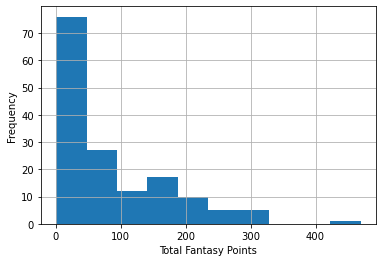

In [60]:
desc_fantpts = skill_data.groupby(["Pos"]).describe()["FantasyPoints"]
desc_fantpts
fantasy_column = skill_data["FantasyPoints"]


fantasy_column.hist()
plt.xlabel("Total Fantasy Points")
plt.ylabel("Frequency")
plt.show()

In [61]:
desc_fantpts = skill_data.groupby(["Pos"]).describe()["FantasyPoints"]
desc_fantpts

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
RB,153.0,79.707712,88.202045,0.3,9.8,48.2,135.4,469.2


In [90]:
top_q_scorers = skill_data[skill_data["FantasyPoints"].gt(135.39)]


#tq_rshyd_mean = skill_data["RushingYds"].mean()

tq_rushyds = top_q_scorers["RushingYds"]

tq_recyds = top_q_scorers["ReceivingYds"]

tq_totalyds = tq_rushyds + tq_recyds

tq_totalyds

Pos
RB    2392.0
RB    1746.0
RB    1558.0
RB    1777.0
RB    1654.0
RB    1772.0
RB    1550.0
RB    1265.0
RB    1496.0
RB    1441.0
RB    1424.0
RB    1064.0
RB    1674.0
RB    1316.0
RB    1327.0
RB    1330.0
RB    1173.0
RB    1162.0
RB    1207.0
RB     952.0
RB    1250.0
RB    1074.0
RB    1112.0
RB    1006.0
RB    1066.0
RB     908.0
RB    1033.0
RB    1040.0
RB     908.0
RB     872.0
RB     969.0
RB     724.0
RB     715.0
RB     711.0
RB     820.0
RB     713.0
RB     715.0
RB     752.0
RB     669.0
dtype: float64

In [6]:
# Identify Variables 


position_points = skill_data.groupby(["Pos"]).mean()["FantasyPoints"]
desc_fantpts = skill_data.groupby(["Pos"]).describe()["FantasyPoints"]
desc_fantpts
position_recs = skill_data.groupby(["Pos"]).mean()["Rec"]

position_yd = skill_data.groupby(["Pos"]).mean()["ReceivingYds"]

position_td = skill_data.groupby(["Pos"]).mean()["ReceivingTD"]

position_rushtd = skill_data.groupby(["Pos"]).mean()["RushingTD"]

position_rushyd = skill_data.groupby(["Pos"]).mean()["RushingYds"]

position_age = skill_data.groupby(["Pos"]).mean()["Age"]

position_tot_yds = skill_data.groupby(["Pos"]).mean()["Yds.2"]

big_df = pd.DataFrame({
    
    
    "Avg. Total Points": position_points,
    "Avg. Receptions": position_recs,
    "Avg. Rec Yards": position_yd,
    "Avg Rec TDs": position_td,
    "Avg Rush Yards": position_rushyd,
    "Avg Rush TDs": position_rushtd,
    "Avg Age": position_age,
    "Avg. Total Yds": position_tot_yds})

big_df

,Avg. Total Points,Avg. Receptions,Avg. Rec Yards,Avg Rec TDs,Avg Rush Yards,Avg Rush TDs,Avg Age,Avg. Total Yds
Pos,,,,,,,,
RB,74.844464,16.582294,134.649626,0.665835,293.992519,2.066085,25.541147,134.649626


In [7]:
desc_rec = skill_data.groupby(["Pos"]).describe()["Rec"]

desc_rec


,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
RB,802.0,16.582294,18.923166,0.0,2.25,9.0,25.75,116.0


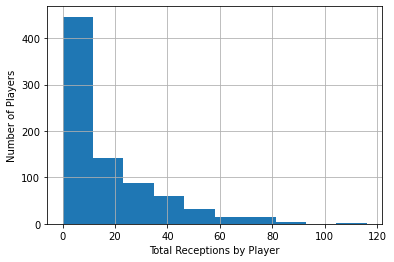

In [8]:
# Histogram --

rec_data_df = skill_data["Rec"]


rec_data_df.hist()
plt.xlabel("Total Receptions by Player")
plt.ylabel("Number of Players")
plt.show()


In [15]:
desc_rec = skill_data.groupby(["Pos"]).describe()["ReceivingYds"]

desc_rec


,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
RB,802.0,134.649626,162.674205,-6.0,17.0,73.0,200.75,1005.0


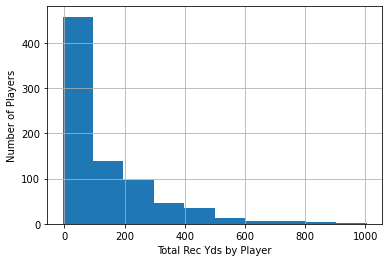

In [9]:
# Histogram --

recyds_df = skill_data["ReceivingYds"]


recyds_df.hist()
plt.xlabel("Total Rec Yds by Player")
plt.ylabel("Number of Players")
plt.show()


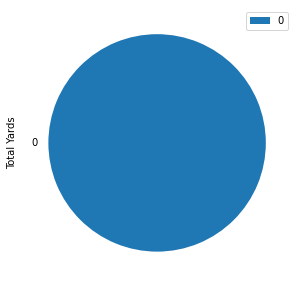

In [47]:
# Build Total Yards Metric

rushyds = skill_data["RushingYds"].sum()

recyds = skill_data["ReceivingYds"].sum()

total_yds = rushyds + recyds

yds_df = pd.DataFrame({
    
        "Rushing Yards": [rushyds],
        "Receiving Yards": recyds,
        "Total Yards": total_yds})

yds_df

plot = yds_df.plot.pie(y="Total Yards", figsize=(5,5))

plot
